In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\dilip-k\\MachineLearning_Models\\adult.data.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [60]:
df.iloc[0,-1]

'<=50K'

In [3]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
             'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
             'hours_per_week', 'native_country', 'income']

In [4]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape

(32561, 15)

In [6]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
#find categorical variables
categorical = [var for var in df.columns if df.dtypes[var] == 'O']
print("There are {} Categorical variables/n".format(len(categorical)))
print("The Categorical variables are ",categorical)

There are 9 Categorical variables/n
The Categorical variables are  ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [9]:
numerical = [var for var in df.columns if df.dtypes[var] != 'O']
print("There are {} Numerical variables/n".format(len(numerical)))
print("The Numerical variables are ",numerical)

There are 6 Numerical variables/n
The Numerical variables are  ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [10]:
for col in categorical:
    print(df[col].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

C:\Users\dilip-k\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dilip-k\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dilip-k\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dilip-k\Anaconda

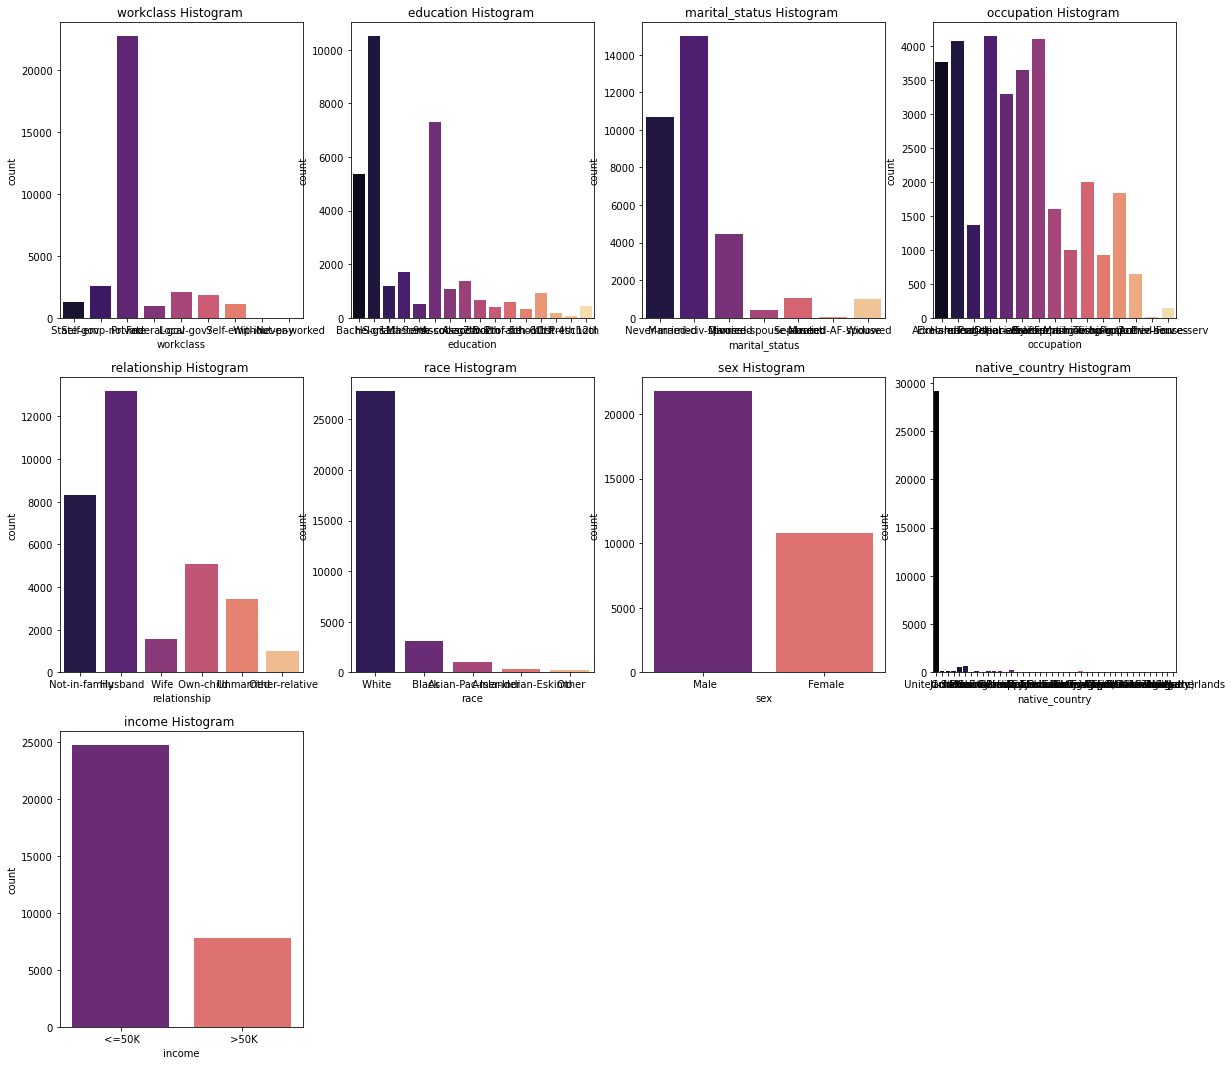

In [11]:
#Exploratory Analysis
#categorical variable sns.countplot()
def plot_count(x,fig):
    plt.subplot(4,4,fig)
    plt.title(x + ' Histogram ')
    sns.countplot(df[x],palette = ('magma'))


plt.figure(figsize = (20,25))

for i in range(len(categorical)):
    plot_count(categorical[i], i+1)

C:\Users\dilip-k\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dilip-k\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dilip-k\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

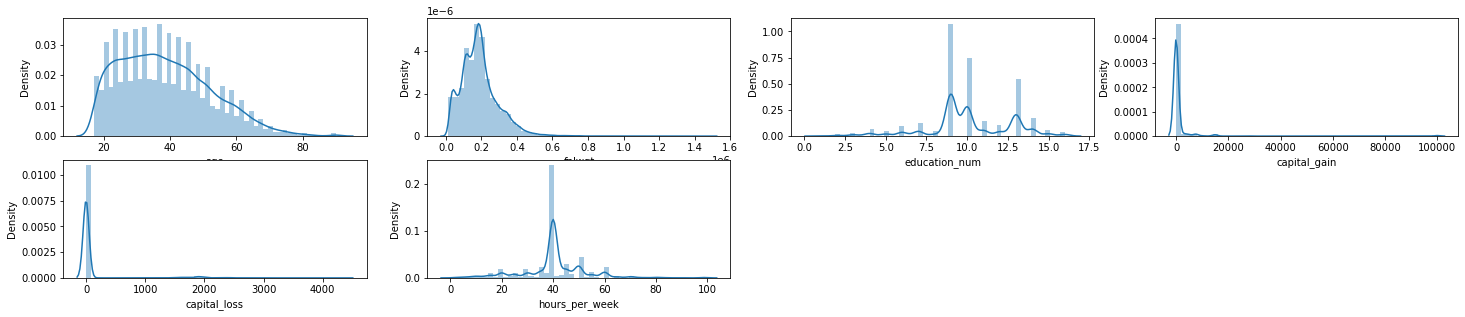

In [12]:
#numerical variable - sns.distplot()
f = plt.figure(figsize=(25,10))
for col in numerical:
    plt.subplot(4,4,numerical.index(col)+1)
    sns.distplot(df[col])

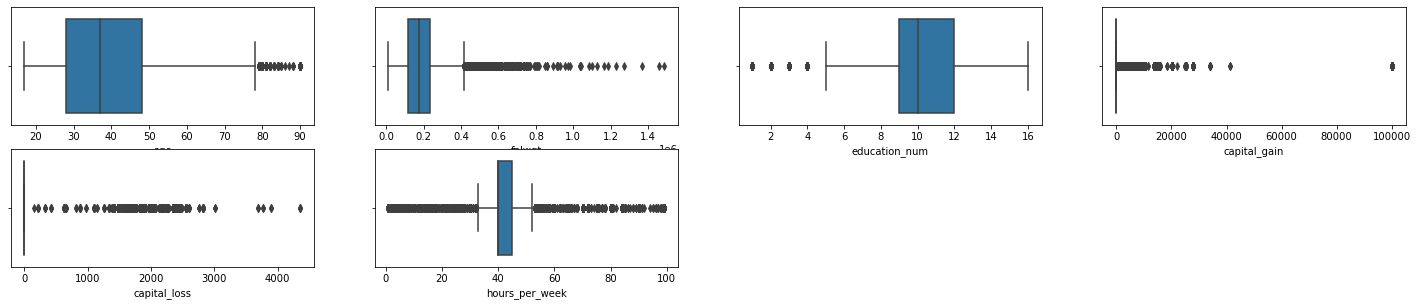

In [13]:
# Box plot for numerical variable
f = plt.figure(figsize=(25,10))
for col in numerical:
    plt.subplot(4,4,numerical.index(col) + 1)
    sns.boxplot(x=col,data=df)

<AxesSubplot:>

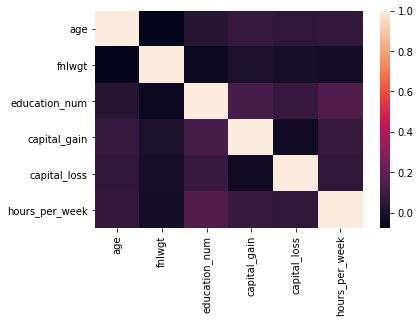

In [14]:
#correlation matrix & heatmap
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

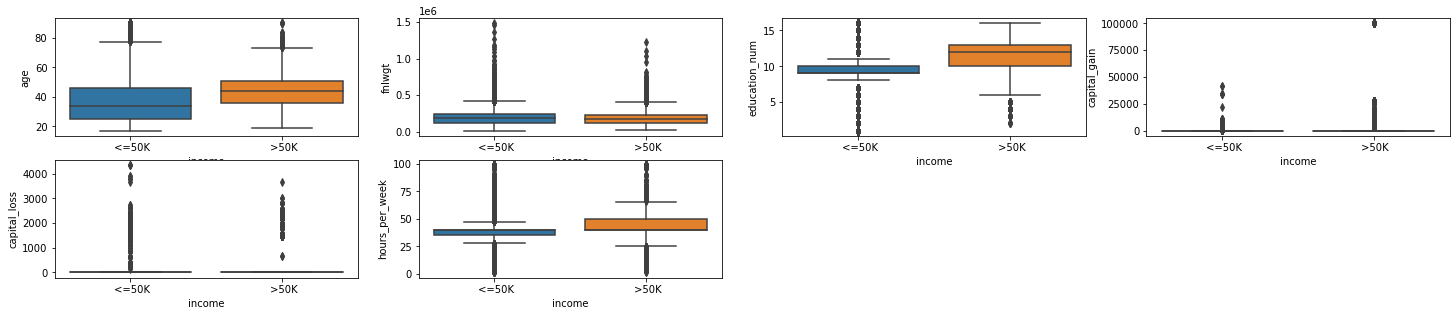

In [15]:
#categorical vs numerical
f = plt.figure(figsize=(25,10))
for col in numerical:
    plt.subplot(4,4,numerical.index(col)+1)
    sns.boxplot(x='income',y=col,data=df)

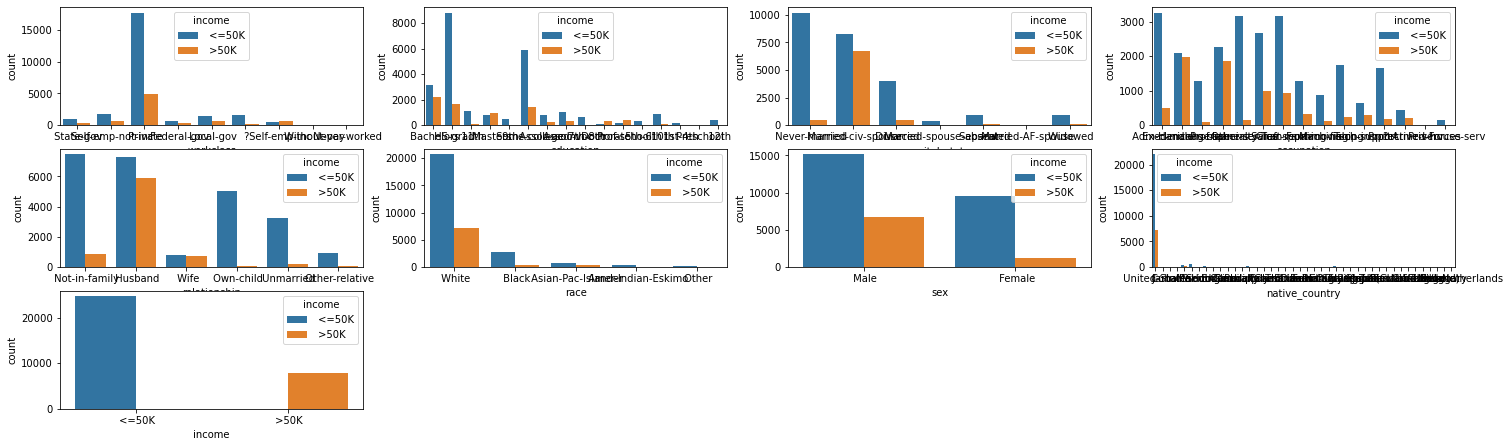

In [16]:
#categorical vs categorical
f = plt.figure(figsize=(25,10))
for col in categorical:
    plt.subplot(4,4,categorical.index(col) + 1)
    sns.countplot(x=col,hue='income',data=df)

In [17]:
# check for null values
df.isnull().values.any()

False

In [18]:
for col in numerical:
    print(df[col].value_counts())

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64
164190    13
203488    13
123011    13
113364    12
121124    12
          ..
284211     1
312881     1
177711     1
179758     1
229376     1
Name: fnlwgt, Length: 21648, dtype: int64
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital_gain, Length: 119, dtype: int64
0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capital_loss, Length: 92, dtype: int64
40    15217
50     2819
45     18

In [19]:
# find how many columns has the value '?' and how many '?' values are present
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [20]:
for col in categorical:
    df[col] = df[col].str.strip()

In [21]:
for col in df.columns:
    df[col].replace('?',np.nan, inplace=True)

In [22]:
df.isnull().values.any()

True

In [23]:
df[categorical].isnull().values.any()

True

In [24]:
df[numerical].isnull().values.any()

False

In [25]:
for col in categorical:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [26]:
df[categorical].isnull().values.any()

False

In [61]:
X = df.iloc[:,:-1]

In [62]:
y = df.iloc[:,-1]

In [63]:
X.shape

(32561, 14)

In [64]:
y.shape

(32561,)

In [65]:
y[0]

'<=50K'

In [67]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [68]:
X_train.shape, X_test.shape

((26048, 14), (6513, 14))

In [73]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'],return_df=True)

In [74]:
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [75]:
X_train.head()

,age,workclass_0,workclass_1,workclass_2,workclass_3,fnlwgt,education_0,education_1,education_2,education_3,...,capital_gain,capital_loss,hours_per_week,native_country_0,native_country_1,native_country_2,native_country_3,native_country_4,native_country_5,native_country_6
15282,36,0,0,0,1,174308,0,0,0,0,...,0,0,40,0,0,0,0,0,0,1
24870,35,0,0,0,1,198202,0,0,0,1,...,0,0,54,0,0,0,0,0,0,1
18822,38,0,0,0,1,52963,0,0,0,1,...,0,0,50,0,0,0,0,0,0,1
26404,50,0,0,0,1,138270,0,0,0,1,...,0,0,40,0,0,0,0,0,0,1
7842,68,0,0,1,0,116903,0,0,1,0,...,0,2149,40,0,0,0,0,0,0,1


In [76]:
#Feature scaling
cols = X_train.columns

In [77]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test,columns=[cols])

In [79]:
X_train.head()

,age,workclass_0,workclass_1,workclass_2,workclass_3,fnlwgt,education_0,education_1,education_2,education_3,...,capital_gain,capital_loss,hours_per_week,native_country_0,native_country_1,native_country_2,native_country_3,native_country_4,native_country_5,native_country_6
0,-0.052632,0.0,0.0,0.0,0.0,-0.030971,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.105263,0.0,0.0,0.0,0.0,0.169550,0.0,0.0,0.0,0.0,...,0.0,0.0,2.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.052632,0.0,0.0,0.0,0.0,-1.049314,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.684211,0.0,0.0,0.0,0.0,-0.333407,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.631579,0.0,0.0,1.0,-1.0,-0.512721,0.0,0.0,1.0,-1.0,...,0.0,2149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [82]:
y_pred = gnb.predict(X_test)
y_pred

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '>50K', '<=50K'],
      dtype='<U5')

In [83]:
from sklearn.metrics import accuracy_score

print('Model accuracy score : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score : 0.8115
